In [14]:
pwd

'C:\\Users\\KAVINYUVA\\Downloads'

In [15]:
# Image Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
pwd

'C:\\Users\\KAVINYUVA\\Downloads'

In [18]:
x_train = train_datagen.flow_from_directory(r'C:\Users\KAVINYUVA\Downloads\SmartInternzVideo\fruit-dataset\train',target_size = (128,128),batch_size=8,class_mode = 'categorical')
x_test = test_datagen.flow_from_directory(r'C:\Users\KAVINYUVA\Downloads\SmartInternzVideo\fruit-dataset\test',target_size = (128,128),batch_size=8,class_mode = 'categorical')

Found 5384 images belonging to 6 classes.
Found 1686 images belonging to 6 classes.


In [19]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [20]:
x_test.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [21]:
# CNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [22]:
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [23]:
# Hidden Layers

model.add(Dense(128 ,activation='relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))


In [24]:
# Output Layer

model.add(Dense(6,activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 127008)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               16257152  
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                      

In [25]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [26]:
#model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)
#model.fit(x_train,steps_per_epoch=5384//8,validation_data=x_test,validation_steps=1686//8,epochs=5)

Epoch 1/10
673/673 [==============================] - 68s 100ms/step - loss: 0.5560 - accuracy: 0.8171 - val_loss: 0.3626 - val_accuracy: 0.8766
Epoch 2/10
673/673 [==============================] - 69s 103ms/step - loss: 0.2916 - accuracy: 0.8997 - val_loss: 0.2892 - val_accuracy: 0.9081
Epoch 3/10
673/673 [==============================] - 83s 124ms/step - loss: 0.2267 - accuracy: 0.9186 - val_loss: 0.1790 - val_accuracy: 0.9371
Epoch 4/10
673/673 [==============================] - 63s 94ms/step - loss: 0.2102 - accuracy: 0.9264 - val_loss: 0.2208 - val_accuracy: 0.9158
Epoch 5/10
673/673 [==============================] - 70s 104ms/step - loss: 0.1912 - accuracy: 0.9368 - val_loss: 0.1716 - val_accuracy: 0.9431
Epoch 6/10
673/673 [==============================] - 67s 100ms/step - loss: 0.1645 - accuracy: 0.9441 - val_loss: 0.3252 - val_accuracy: 0.8962
Epoch 7/10
673/673 [==============================] - 68s 101ms/step - loss: 0.1797 - accuracy: 0.9422 - val_loss: 0.1473 - val_acc

In [27]:
# Saving The Model

model.save("fruits.h5")

In [28]:
pwd

'C:\\Users\\KAVINYUVA\\Downloads'

In [29]:
#Testing the model
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
#load the model
model = load_model('fruits.h5')

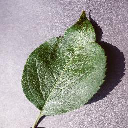

In [31]:
img = image.load_img(r'C:\Users\KAVINYUVA\Downloads\SmartInternzVideo\fruit-dataset\test\Apple___healthy\0f33804a-5389-49cc-abb1-c414b243991b___RS_HL 7321.jpg',target_size=(128,128))
img

In [32]:
x=image.img_to_array(img)

In [33]:
x

array([[[165., 156., 173.],
        [172., 163., 180.],
        [174., 165., 182.],
        ...,
        [138., 124., 139.],
        [126., 112., 127.],
        [116., 102., 117.]],

       [[162., 153., 170.],
        [170., 161., 178.],
        [176., 167., 184.],
        ...,
        [159., 145., 160.],
        [141., 127., 142.],
        [130., 116., 131.]],

       [[177., 168., 185.],
        [179., 170., 187.],
        [178., 169., 186.],
        ...,
        [142., 128., 143.],
        [160., 146., 161.],
        [161., 147., 162.]],

       ...,

       [[223., 217., 221.],
        [224., 218., 222.],
        [217., 211., 215.],
        ...,
        [153., 140., 150.],
        [164., 151., 161.],
        [208., 195., 205.]],

       [[220., 214., 218.],
        [216., 210., 214.],
        [219., 213., 217.],
        ...,
        [206., 193., 203.],
        [153., 140., 150.],
        [154., 141., 151.]],

       [[219., 213., 217.],
        [201., 195., 199.],
        [210., 2

In [34]:
x.ndim

3

In [35]:
x.shape

(128, 128, 3)

In [36]:
x=np.expand_dims(x,axis=0)

In [37]:
x

array([[[[165., 156., 173.],
         [172., 163., 180.],
         [174., 165., 182.],
         ...,
         [138., 124., 139.],
         [126., 112., 127.],
         [116., 102., 117.]],

        [[162., 153., 170.],
         [170., 161., 178.],
         [176., 167., 184.],
         ...,
         [159., 145., 160.],
         [141., 127., 142.],
         [130., 116., 131.]],

        [[177., 168., 185.],
         [179., 170., 187.],
         [178., 169., 186.],
         ...,
         [142., 128., 143.],
         [160., 146., 161.],
         [161., 147., 162.]],

        ...,

        [[223., 217., 221.],
         [224., 218., 222.],
         [217., 211., 215.],
         ...,
         [153., 140., 150.],
         [164., 151., 161.],
         [208., 195., 205.]],

        [[220., 214., 218.],
         [216., 210., 214.],
         [219., 213., 217.],
         ...,
         [206., 193., 203.],
         [153., 140., 150.],
         [154., 141., 151.]],

        [[219., 213., 217.],
       

In [38]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 109ms/step


In [39]:
y

array([1], dtype=int64)

In [40]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [41]:
index=['Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy']

In [42]:
index[y[0]]

'Apple___healthy'

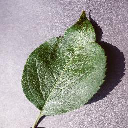

In [43]:
img = image.load_img(r'C:\Users\KAVINYUVA\Downloads\SmartInternzVideo\fruit-dataset\test\Apple___healthy\0f33804a-5389-49cc-abb1-c414b243991b___RS_HL 7321.jpg',target_size=(128,128))
img

In [44]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y = np.argmax(model.predict(x),axis=1)

index=['Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy']

index[y[0]]

1/1 [==============================] - 0s 18ms/step


'Apple___healthy'

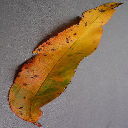

In [45]:
img = image.load_img(r'C:\Users\KAVINYUVA\Downloads\SmartInternzVideo\fruit-dataset\test\Peach___Bacterial_spot\0e37dd9c-c73d-403b-81c9-60c108607d1a___Rutg._Bact.S 1610.jpg',target_size=(128,128))
img

In [46]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y= np.argmax(model.predict(x),axis=1)

index=['Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy']
index[y[0]]

1/1 [==============================] - 0s 25ms/step


'Peach___Bacterial_spot'